In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
coordinates = list(lat_lngs)
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54bde5d64f2981ff69a51d07be2be615&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":71.89,"feels_like":72.63,"temp_min":68.16,"temp_max":74.23,"pressure":1013,"humidity":82},"visibility":10000,"wind":{"speed":16.11,"deg":240,"gust":25.32},"clouds":{"all":100},"dt":1663551649,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1663496840,"sunset":1663541375},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [17]:
city_weather_json = city_weather.json()

In [27]:
city_weather_json["weather"][0]["description"]

'overcast clouds'

In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [30]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 71.89,
  'feels_like': 72.63,
  'temp_min': 68.16,
  'temp_max': 74.23,
  'pressure': 1013,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 240, 'gust': 25.32},
 'clouds': {'all': 100},
 'dt': 1663551597,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1663496840,
  'sunset': 1663541375},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [31]:
# Get the JSON data.
boston_data = city_weather.json()

In [41]:
boston_data["coord"]["lat"]

42.3584

In [43]:
boston_data["main"]['temp_max']

74.23

In [44]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 74.23 82 100 16.11


In [49]:
# Import the datetime module from the datetime library.
from datetime import datetime
import time
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-09-19 01:39:57'

In [51]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------


In [54]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | mataura
Processing Record 2 of Set 12 | cachoeirinha
Processing Record 3 of Set 12 | yumen
Processing Record 4 of Set 12 | ushuaia
Processing Record 5 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 12 | albany
Processing Record 7 of Set 12 | falun
Processing Record 8 of Set 12 | alamosa
Processing Record 9 of Set 12 | busselton
Processing Record 10 of Set 12 | sao miguel do araguaia
Processing Record 11 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 12 | rikitea
Processing Record 13 of Set 12 | san policarpo
Processing Record 14 of Set 12 | calawag
Processing Record 15 of Set 12 | port hardy
Processing Record 16 of Set 12 | burns lake
Processing Record 17 of Set 12 | kantunilkin
Processing Record 18 of Set 12 | killybegs
Processing Record 19 of Set 12 | atuona
Processing Record 20 of Set 12 | chokurdakh
Processing Record 21 of Set 12 | vaini
Processing Record 22 of Set 12 | taburi
City not

City not found. Skipping...
Processing Record 33 of Set 15 | marisel
Processing Record 34 of Set 15 | dera gopipur
Processing Record 35 of Set 15 | sarany
Processing Record 36 of Set 15 | ilulissat
Processing Record 37 of Set 15 | araouane
Processing Record 38 of Set 15 | bubaque
Processing Record 39 of Set 15 | dipkarpaz
City not found. Skipping...
Processing Record 40 of Set 15 | traverse city
Processing Record 41 of Set 15 | garissa
Processing Record 42 of Set 15 | chuy
Processing Record 43 of Set 15 | ponta do sol
Processing Record 44 of Set 15 | clyde river
Processing Record 45 of Set 15 | mortka
Processing Record 46 of Set 15 | gisborne
Processing Record 47 of Set 15 | ostrovnoy
Processing Record 48 of Set 15 | skagastrond
City not found. Skipping...
Processing Record 49 of Set 15 | coihaique
Processing Record 50 of Set 15 | codrington
Processing Record 1 of Set 16 | moose factory
Processing Record 2 of Set 16 | nuuk
Processing Record 3 of Set 16 | avera
Processing Record 4 of Se

Processing Record 18 of Set 19 | muisne
Processing Record 19 of Set 19 | ziway
Processing Record 20 of Set 19 | inirida
Processing Record 21 of Set 19 | rocha
Processing Record 22 of Set 19 | cervo
Processing Record 23 of Set 19 | tambura
Processing Record 24 of Set 19 | necochea
Processing Record 25 of Set 19 | garmisch-partenkirchen
Processing Record 26 of Set 19 | najran
Processing Record 27 of Set 19 | alyangula
Processing Record 28 of Set 19 | itacare
Processing Record 29 of Set 19 | saint-philippe
Processing Record 30 of Set 19 | mariental
Processing Record 31 of Set 19 | mar del plata
Processing Record 32 of Set 19 | namatanai
Processing Record 33 of Set 19 | haines junction
Processing Record 34 of Set 19 | pacific grove
Processing Record 35 of Set 19 | antoniny
Processing Record 36 of Set 19 | zhanaozen
Processing Record 37 of Set 19 | prelouc
Processing Record 38 of Set 19 | komsomolskiy
Processing Record 39 of Set 19 | manta
Processing Record 40 of Set 19 | tarakan
Processing

Processing Record 50 of Set 22 | sabha
Processing Record 1 of Set 23 | marjamaa
Processing Record 2 of Set 23 | tautira
Processing Record 3 of Set 23 | gao
Processing Record 4 of Set 23 | wad madani
Processing Record 5 of Set 23 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 23 | anadyr
Processing Record 7 of Set 23 | pringsewu
Processing Record 8 of Set 23 | lancaster
Processing Record 9 of Set 23 | gaurnadi
Processing Record 10 of Set 23 | san quintin
Processing Record 11 of Set 23 | kamenskoye
City not found. Skipping...
Processing Record 12 of Set 23 | isangel
Processing Record 13 of Set 23 | deputatskiy
Processing Record 14 of Set 23 | caravelas
Processing Record 15 of Set 23 | shkotovo-22
City not found. Skipping...
Processing Record 16 of Set 23 | tuggurt
City not found. Skipping...
Processing Record 17 of Set 23 | biu
Processing Record 18 of Set 23 | aksu
Processing Record 19 of Set 23 | am timan
Processing Record 20 of Set 23 | xichang
Processing Record 21 o

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,61.00,58,100,6.13,NZ,2022-09-19 03:02:30
1,Cachoeirinha,-29.9511,-51.0939,63.97,81,100,4.54,BR,2022-09-19 03:02:30
2,Yumen,40.2833,97.2000,72.50,27,57,14.29,CN,2022-09-19 03:02:31
3,Ushuaia,-54.8000,-68.3000,37.06,70,0,0.00,AR,2022-09-19 02:59:00
4,Albany,42.6001,-73.9662,67.68,94,98,4.79,US,2022-09-19 02:57:40
5,Falun,60.6036,15.6260,48.94,85,97,10.18,SE,2022-09-19 03:02:32
6,Alamosa,37.4695,-105.8700,60.78,39,20,5.75,US,2022-09-19 03:02:32
7,Busselton,-33.6500,115.3333,57.09,80,77,18.84,AU,2022-09-19 03:00:25
8,Sao Miguel Do Araguaia,-13.2750,-50.1628,77.63,60,15,2.08,BR,2022-09-19 03:02:33
9,Rikitea,-23.1203,-134.9692,72.32,76,27,18.52,PF,2022-09-19 03:02:33


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [60]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/18/22'

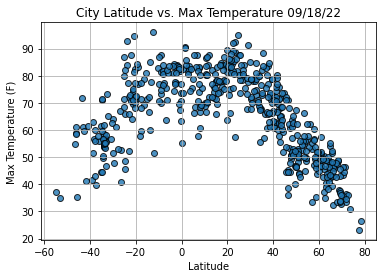

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

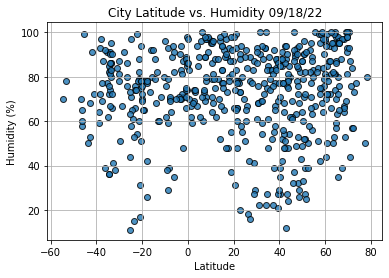

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

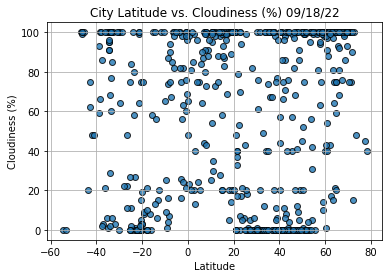

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

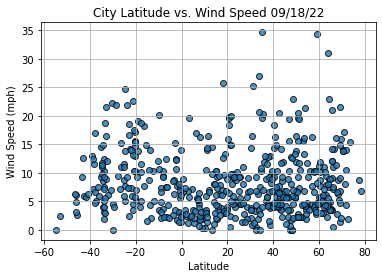

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Yumen,40.2833,97.2000,72.50,27,57,14.29,CN,2022-09-19 03:02:31
4,Albany,42.6001,-73.9662,67.68,94,98,4.79,US,2022-09-19 02:57:40
5,Falun,60.6036,15.6260,48.94,85,97,10.18,SE,2022-09-19 03:02:32
6,Alamosa,37.4695,-105.8700,60.78,39,20,5.75,US,2022-09-19 03:02:32
10,San Policarpo,12.1791,125.5072,87.64,62,100,6.93,PH,2022-09-19 03:02:34


In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

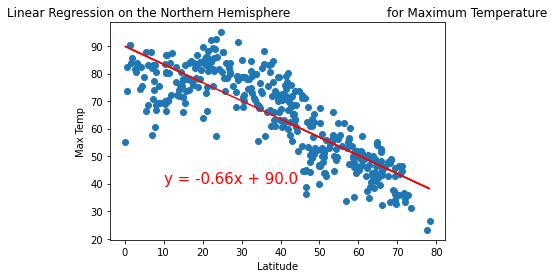

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

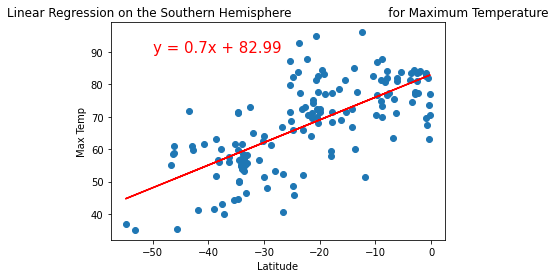

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

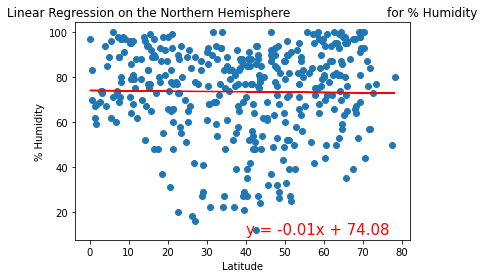

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

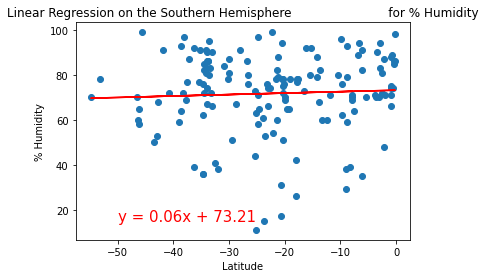

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

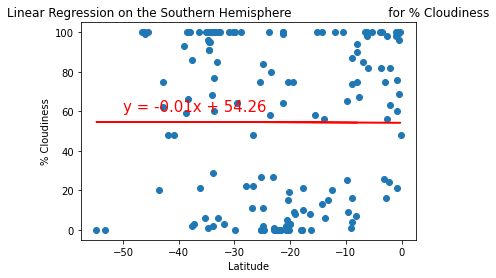

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

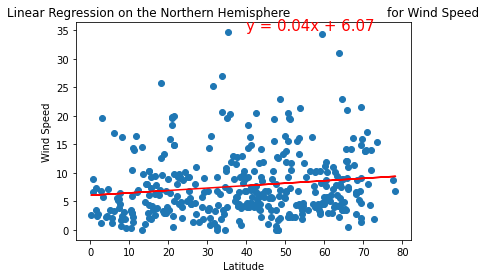

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

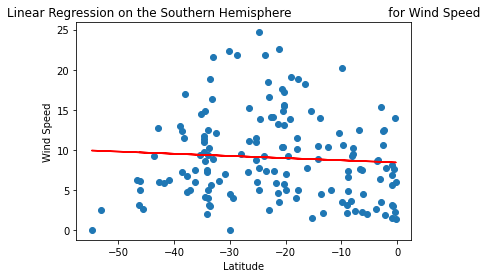

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))